In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier


In [59]:
df = pd.read_csv('../data/large_train_sample.csv')

In [60]:





df['net-capital'] = df['capital-gain'] - df['capital-loss']
df['native-us'] = np.where(df['native-country']== ' United-States', 1, 0)
df.drop(columns=['education','capital-gain','capital-loss','native-country'],inplace=True)

In [61]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,sex,hours-per-week,wage,net-capital,native-us
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,Male,40,<=50K,2174,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,<=50K,0,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,<=50K,0,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,<=50K,0,1
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,<=50K,0,0


In [62]:
df.head(25)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,sex,hours-per-week,wage,net-capital,native-us
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,Male,40,<=50K,2174,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,<=50K,0,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,<=50K,0,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,<=50K,0,1
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,<=50K,0,0
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,Female,40,<=50K,0,1
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Female,16,<=50K,0,0
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,Male,45,>50K,0,1
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,Female,50,>50K,14084,1
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,Male,40,>50K,5178,1


In [63]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [64]:
df['workclass'].replace(' ?', df['workclass'].mode()[0], inplace = True)

In [65]:
df['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [66]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [67]:
df['fnlwgt']

0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 32561, dtype: int64

In [68]:
df['wage']=df['wage'].map({' <=50K':1,' >50K':0})

In [69]:
df.head(3)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,sex,hours-per-week,wage,net-capital,native-us
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,Male,40,1,2174,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,1,0,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,1,0,1


In [70]:
df['occupation'].replace(' ?', df['occupation'].mode()[0], inplace = True)

In [71]:
df.corr()[['wage']].sort_values(by='wage', ascending=False).head(10)

,wage
wage,1.000000
fnlwgt,0.009463
native-us,-0.034470
net-capital,-0.214428
hours-per-week,-0.229689
age,-0.234037
education-num,-0.335154


In [72]:
df=pd.get_dummies(df,columns=['workclass','marital-status', 'occupation', 'relationship', 'sex'],drop_first=True)

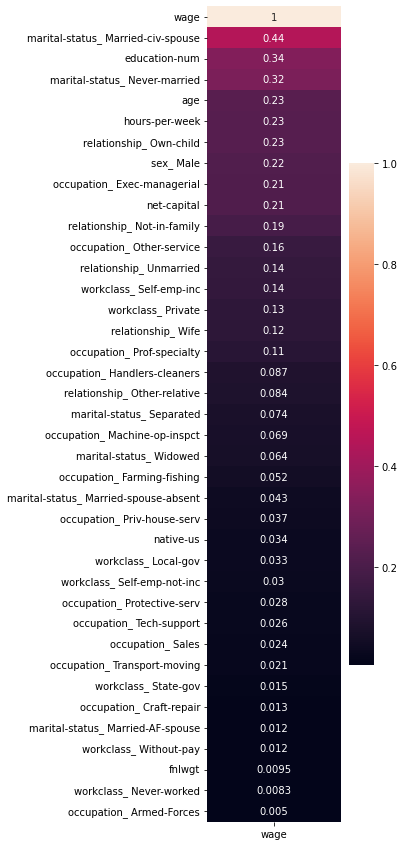

In [73]:
plt.figure(figsize = (3, 15))
sns.heatmap(pd.DataFrame(abs(df.corr()["wage"]).sort_values(ascending = False)), annot = True);


In [17]:
# Hold my abalone.

X = df[pd.DataFrame(abs(df.corr()["wage"]).sort_values(ascending = False)).iloc[1:,:].reset_index().rename(columns = {"index" : "feature", "wage" : "corr"})["feature"][:20]]
y = df['wage']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [19]:
rf = RandomForestClassifier(n_estimators=100)

In [20]:
et = ExtraTreesClassifier(n_estimators=100)

In [21]:
y.value_counts(normalize=True)

1    0.75919
0    0.24081
Name: wage, dtype: float64

In [22]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8445945945945945

In [23]:
cross_val_score(et, X_train, y_train, cv=5).mean()

0.8307944307944309

In [24]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8488943488943489


{'max_depth': 5, 'n_estimators': 200}

In [25]:
gs.score(X_train, y_train)

0.8495085995085995

In [26]:
gs.score(X_test, y_test)

0.8467018793759981

In [27]:
preds = gs.predict(X_train)

In [28]:
preds2 = gs.predict(X_test)

In [29]:
f1_score(y_train, preds)

0.9063622697276225

In [30]:
f1_score(y_test, preds2)

0.9048635462722976

In [31]:
AdaBoostClassifier()

AdaBoostClassifier()

In [32]:
tree = DecisionTreeClassifier(max_depth=1, random_state=111)
ada = AdaBoostClassifier(tree, n_estimators=100, learning_rate=1, algorithm='SAMME.R')

In [33]:
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=111),
                   learning_rate=1, n_estimators=100)

In [34]:
print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))

0.8640868140868141
0.8580027023707161


In [201]:
#ada_params = {
 #   'n_estimators': [100, 150, 200],
  #  'max_depth': [None, 1, 2, 3, 4, 5],
#}

In [ ]:
#gsada = GridSearchCV(ada, param_grid=ada_params, cv=5)
#gs.fit(X_train, y_train)
#print(gs.best_score_)
#gs.best_params_

In [ ]:
#gsada.fit(X_train, y_train)

In [35]:
preds3 = ada.predict(X_train)

In [36]:
preds4 = ada.predict(X_test)

In [37]:
f1_score(y_train, preds3)

0.9130628388820494

In [38]:
f1_score(y_test, preds4)

0.9095036793486769

In [39]:
# Gradient Boost

In [40]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [41]:
print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))

0.8676085176085176
0.8605822380542931


In [42]:
pgrid = {
    'learning_rate': [0.1, 1, 10],
    'n_estimators': [10, 100],
    'max_depth': [None, 1, 2, 3]
}

gb = GradientBoostingClassifier(random_state=222)
gs2 = GridSearchCV(gb, pgrid, cv=5, n_jobs=6)

In [43]:
gs2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=222),
             n_jobs=6,
             param_grid={'learning_rate': [0.1, 1, 10],
                         'max_depth': [None, 1, 2, 3],
                         'n_estimators': [10, 100]})

In [44]:
print(gs2.score(X_train, y_train))
print(gs2.score(X_test, y_test))

0.8734234234234234
0.8637759489006265


In [45]:
gs2.best_params_

{'learning_rate': 1, 'max_depth': 2, 'n_estimators': 100}

In [46]:
preds5 = gs2.predict(X_train)

In [47]:
preds6 = gs2.predict(X_test)

In [48]:
f1_score(y_train, preds5)

0.919419171511249

In [49]:
f1_score(y_test, preds6)

0.9135282651072125

In [51]:
#VC = VotingClassifier()

In [ ]:
vc = VotingClassifier([
    ("ada", ada),
    ("gb", gb),
    ("rf", rf)
])
vc.fit(X_train, y_train)

In [246]:
vcpreds = vc.predict(X_train)

In [247]:
f1_score(y_train, vcpreds)

0.9215701637546032

In [248]:
vcpreds2 = vc.predict(X_test)

In [249]:
f1_score(y_test, vcpreds2)

0.9114160948222084

In [109]:
df_new=pd.read_csv('../data/test_data.csv')

In [110]:
df_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States


In [111]:
df_new['wage'] = df['wage']  

In [112]:
df_new['native-us'] = np.where(df_new['native-country']== ' United-States', 1, 0)
df_new.drop(columns=['education','native-country'],inplace=True)
df_new['workclass'].replace(' ?', df_new['workclass'].mode()[0], inplace = True)
df_new['wage']=df_new['wage'].map({' <=50K':1,' >50K':0})

df_new['occupation'].replace(' ?', df_new['occupation'].mode()[0], inplace = True)
df_new=pd.get_dummies(df_new,columns=['workclass','marital-status', 'occupation', 'relationship', 'sex'],drop_first=True)

In [113]:
list=['marital-status_ Married-civ-spouse', 'education-num',
       'marital-status_ Never-married', 'age', 'hours-per-week',
       'relationship_ Own-child', 'sex_ Male', 'occupation_ Exec-managerial',
        'relationship_ Not-in-family',
       'occupation_ Other-service', 'relationship_ Unmarried',
       'workclass_ Self-emp-inc', 'workclass_ Private', 'relationship_ Wife',
       'occupation_ Prof-specialty', 'occupation_ Handlers-cleaners',
       'relationship_ Other-relative', 'marital-status_ Separated',
       'occupation_ Machine-op-inspct', 'wage']

In [114]:
X_new=df_new[list]

In [117]:
X_new['wage'] = X_new['wage'].fillna(1)

/var/folders/qs/gg9by_3j16l296v6k689jf1m0000gn/T/ipykernel_6267/3687845619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['wage'] = X_new['wage'].fillna(1)


In [118]:
output_list=(ada).predict(X_new)

/Users/dimarhill/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- wage
Feature names seen at fit time, yet now missing:
- net-capital

  warnings.warn(message, FutureWarning)


In [ ]:
output_df=pd.DataFrame()
output_df['Predictions']=pred
output_df.tocsv('results.csv',drop_index=True)